This notebook will clean the automated CF detections that I got from the previous notebook 'cf-detection-notebook'.

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
%matplotlib notebook

In [3]:
calls_to_keep = pd.read_csv('manual_verif_2021-07-06_13-19_creationtime.csv')
raw_data = pd.read_csv('cf_detection_data.csv')
raw_by_audiofile = raw_data.groupby('audio_file')

In [4]:
calls_to_keep.head()

,Unnamed: 0,audio_file,detections_to_keep
0,0,matching_annotaudio_Aditya_2018-08-16_21502300...,"(1,2,3,4,5,6,7,8,9)"
1,1,matching_annotaudio_Aditya_2018-08-16_21502300...,"(0,1,3)"
2,2,matching_annotaudio_Aditya_2018-08-16_21502300...,"(0,1,2)"
3,3,matching_annotaudio_Aditya_2018-08-16_21502300...,"(0,3,4,5,6,7,8,9,10)"
4,4,matching_annotaudio_Aditya_2018-08-16_21502300...,()


In [5]:
all_calls_to_keep = []
for i, row in calls_to_keep.iterrows():
    ind, audiofilename, detections_tokeep = row
    try:
        callstokeep = list(map(lambda X: int(X), row['detections_to_keep'].replace('(','').replace(')','').split(',')))
    except ValueError:
        callstokeep = list(map(lambda X: int(X), row['detections_to_keep'].replace('(','').replace(')','')))

    if len(callstokeep)>1:
        file_call_measurements  = raw_by_audiofile.get_group(row['audio_file'])
        proper_call_measurements = file_call_measurements[file_call_measurements['cf_detection_number'].isin(callstokeep)]
        all_calls_to_keep.append(proper_call_measurements)
verified_calls = pd.concat(all_calls_to_keep).reset_index(drop=True)

In [6]:
verified_calls['duration'] = verified_calls['detection_stop'] - verified_calls['detection_start']

In [7]:
verified_calls

,Unnamed: 0,audio_file,cf_detection_number,detection_start,detection_stop,duration
0,1,matching_annotaudio_Aditya_2018-08-16_21502300...,1.0,0.038616,0.053604,0.014988
1,2,matching_annotaudio_Aditya_2018-08-16_21502300...,2.0,0.190828,0.206116,0.015288
2,3,matching_annotaudio_Aditya_2018-08-16_21502300...,3.0,0.212684,0.228648,0.015964
3,4,matching_annotaudio_Aditya_2018-08-16_21502300...,4.0,0.234760,0.248680,0.013920
4,5,matching_annotaudio_Aditya_2018-08-16_21502300...,5.0,0.254712,0.267968,0.013256
...,...,...,...,...,...,...
395,0,matching_annotaudio_Aditya_2018-08-20_0300-040...,0.0,0.014436,0.030464,0.016028
396,2,matching_annotaudio_Aditya_2018-08-20_0300-040...,2.0,0.151844,0.167420,0.015576
397,4,matching_annotaudio_Aditya_2018-08-20_0300-040...,4.0,0.235596,0.254072,0.018476
398,1,matching_annotaudio_Aditya_2018-08-20_0300-040...,1.0,0.145944,0.156888,0.010944


<IPython.core.display.Javascript object>


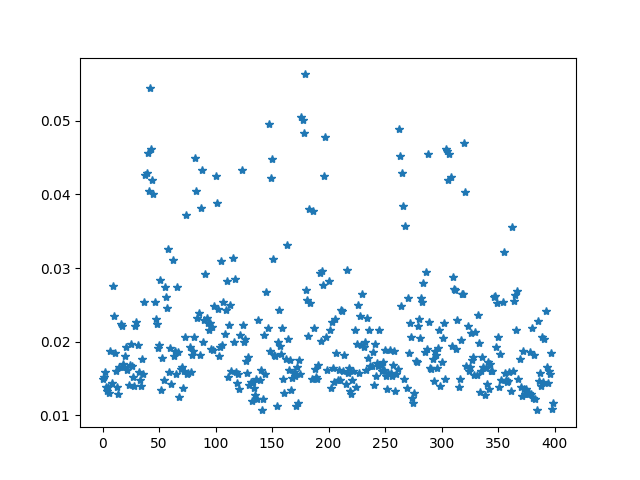

In [8]:
plt.figure()
plt.plot(verified_calls['duration'],'*')

Also attach labels of single/multi bat to each audio chosen. Get these labels from the individual call analysis

In [9]:
df = pd.read_csv('../individual_call_analysis/analysis/one_call_per_row_2020-12-17.csv')

In [10]:
audiofile_numbats = df.loc[:,['video_annot_id','num_bats']]
audiofile_numbats

,video_annot_id,num_bats
0,Aditya_2018-08-16_21502300_100,2
1,Aditya_2018-08-16_21502300_101,1
2,Aditya_2018-08-16_21502300_102,1
3,Aditya_2018-08-16_21502300_104,1
4,Aditya_2018-08-16_21502300_108,2
...,...,...
227,Aditya_2018-08-20_0300-0400_61,1
228,Aditya_2018-08-20_0300-0400_85,1
229,Aditya_2018-08-20_0300-0400_90,1
230,Aditya_2018-08-20_0300-0400_91,1


In [11]:
def get_numbats(df, otherdf_with_numbats):
    '''
    '''
    df['num_bats'] = 0
    
    for i, (videoannot, numbats) in otherdf_with_numbats.iterrows():
        add_prefix = 'matching_annotaudio_'+videoannot+'_hp'
        rows_with_same_filename = df['audio_file']==add_prefix
        df.loc[rows_with_same_filename,'num_bats'] = numbats
    return df
    
    
    

In [12]:
get_numbats(verified_calls, audiofile_numbats)

,Unnamed: 0,audio_file,cf_detection_number,detection_start,detection_stop,duration,num_bats
0,1,matching_annotaudio_Aditya_2018-08-16_21502300...,1.0,0.038616,0.053604,0.014988,2
1,2,matching_annotaudio_Aditya_2018-08-16_21502300...,2.0,0.190828,0.206116,0.015288,2
2,3,matching_annotaudio_Aditya_2018-08-16_21502300...,3.0,0.212684,0.228648,0.015964,2
3,4,matching_annotaudio_Aditya_2018-08-16_21502300...,4.0,0.234760,0.248680,0.013920,2
4,5,matching_annotaudio_Aditya_2018-08-16_21502300...,5.0,0.254712,0.267968,0.013256,2
...,...,...,...,...,...,...,...
395,0,matching_annotaudio_Aditya_2018-08-20_0300-040...,0.0,0.014436,0.030464,0.016028,1
396,2,matching_annotaudio_Aditya_2018-08-20_0300-040...,2.0,0.151844,0.167420,0.015576,1
397,4,matching_annotaudio_Aditya_2018-08-20_0300-040...,4.0,0.235596,0.254072,0.018476,1
398,1,matching_annotaudio_Aditya_2018-08-20_0300-040...,1.0,0.145944,0.156888,0.010944,1


<IPython.core.display.Javascript object>


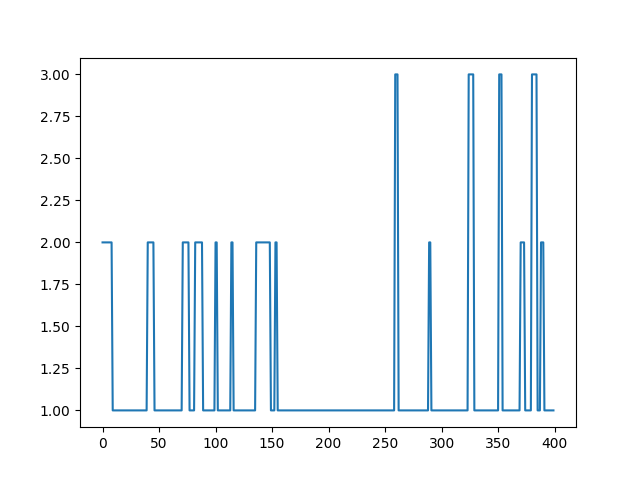

In [13]:
plt.figure()
plt.plot(verified_calls['num_bats'])

In [14]:
verified_calls.to_csv('verified_cf_detections.csv')